In [2]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt  #ARIMA Problem
from statsmodels.tsa.api import seasonal_decompose       #Decomposition, Trend, Seasonal, It
from statsmodels.tsa.stattools import adfuller           #Hypothesis testing to check stationary or non stationary
import matplotlib.pyplot as plt                           #Plotting Graphs

In [3]:
import os
os.getcwd()

'C:\\Users\\Dell\\PYTHON'

In [4]:
sales_data=pd.read_csv("Tractor-Sales.csv")
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
sales_data.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<AxesSubplot:>

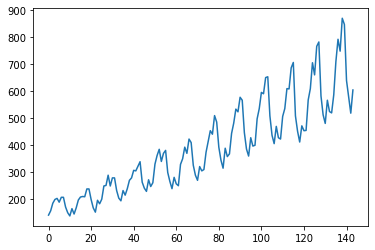

In [7]:
sales_data["Number of Tractor Sold"].plot()

In [8]:
sales_data

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [9]:
pd.date_range("2003-01-01", freq="MS", periods=6)

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01'],
              dtype='datetime64[ns]', freq='MS')

### Converting normal data into Time Series Data

In [10]:
date_range_val=pd.date_range(start='2003-01-01', freq="MS", periods=len(sales_data))

In [11]:
date_range_val

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [12]:
sales_data.set_index(date_range_val,inplace=True)

In [13]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [14]:
sales_data

,Month-Year,Number of Tractor Sold
2003-01-01,Jan-03,141
2003-02-01,Feb-03,157
2003-03-01,Mar-03,185
2003-04-01,Apr-03,199
2003-05-01,May-03,203
...,...,...
2014-08-01,Aug-14,848
2014-09-01,Sep-14,640
2014-10-01,Oct-14,581
2014-11-01,Nov-14,519


<AxesSubplot:>

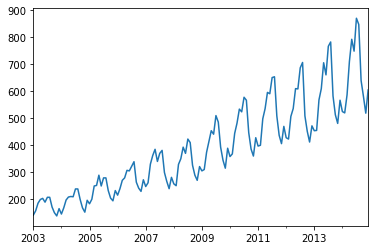

In [15]:
sales_data["Number of Tractor Sold"].plot()

In [16]:
sales_data.rename(columns={"Number of Tractor Sold":"Tractor_Sales"}, inplace=True)

In [17]:
sales_data

,Month-Year,Tractor_Sales
2003-01-01,Jan-03,141
2003-02-01,Feb-03,157
2003-03-01,Mar-03,185
2003-04-01,Apr-03,199
2003-05-01,May-03,203
...,...,...
2014-08-01,Aug-14,848
2014-09-01,Sep-14,640
2014-10-01,Oct-14,581
2014-11-01,Nov-14,519


In [18]:
sales_data.isnull().sum()

Month-Year       0
Tractor_Sales    0
dtype: int64

In [19]:
ts=sales_data.Tractor_Sales

In [20]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64

### Understanding Data

<AxesSubplot:>

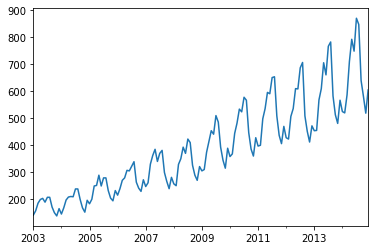

In [21]:
ts.plot()

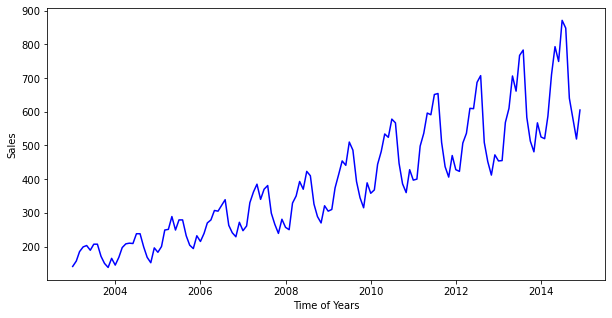

In [22]:
plt.figure(figsize=(10,5))
plt.plot(ts, color="b")
plt.xlabel("Time of Years")
plt.ylabel("Sales")
plt.show()

### Decomposition

In [23]:
decompose=seasonal_decompose(ts, model="multiplicative", two_sided=False, extrapolate_trend=4 )

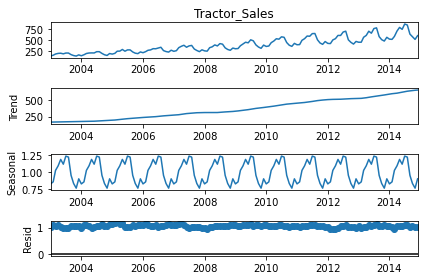

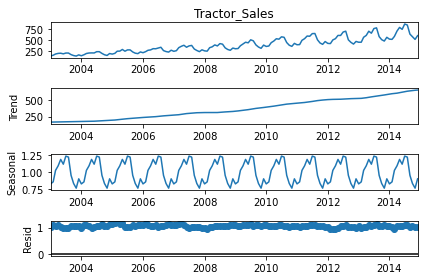

In [24]:
decompose.plot()

In [25]:
decompose.resid

2003-01-01    1.028907
2003-02-01    1.099557
2003-03-01    1.074350
2003-04-01    1.078424
2003-05-01    1.007438
                ...   
2014-08-01    1.078833
2014-09-01    1.038754
2014-10-01    1.071776
2014-11-01    1.038297
2014-12-01    1.018544
Freq: MS, Name: resid, Length: 144, dtype: float64

In [26]:
decompose.seasonal

2003-01-01    0.823508
2003-02-01    0.853891
2003-03-01    1.024830
2003-04-01    1.092962
2003-05-01    1.187805
                ...   
2014-08-01    1.222687
2014-09-01    0.950868
2014-10-01    0.829943
2014-11-01    0.760143
2014-12-01    0.898956
Freq: MS, Name: seasonal, Length: 144, dtype: float64

In [27]:
decompose.trend

2003-01-01    166.408333
2003-02-01    167.216667
2003-03-01    168.025000
2003-04-01    168.833333
2003-05-01    169.641667
                 ...    
2014-08-01    642.875000
2014-09-01    647.958333
2014-10-01    653.166667
2014-11-01    657.583333
2014-12-01    660.750000
Freq: MS, Name: trend, Length: 144, dtype: float64

In [28]:
Decom=pd.concat([decompose.seasonal,decompose.resid, decompose.trend], axis=1)

In [29]:
Decom.to_csv("Decomposition.csv")

In [30]:
decompose_data = pd.concat([decompose.trend, decompose.seasonal, decompose.resid, decompose.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

In [31]:
decompose_data

,Trend,SI,Irregular,Actual
2003-01-01,166.408333,0.823508,1.028907,141.0
2003-02-01,167.216667,0.853891,1.099557,157.0
2003-03-01,168.025000,1.024830,1.074350,185.0
2003-04-01,168.833333,1.092962,1.078424,199.0
2003-05-01,169.641667,1.187805,1.007438,203.0
...,...,...,...,...
2014-08-01,642.875000,1.222687,1.078833,848.0
2014-09-01,647.958333,0.950868,1.038754,640.0
2014-10-01,653.166667,0.829943,1.071776,581.0
2014-11-01,657.583333,0.760143,1.038297,519.0


In [32]:
# decompose_data.to_csv("decompose_data.csv")

### Moving Average

<AxesSubplot:>

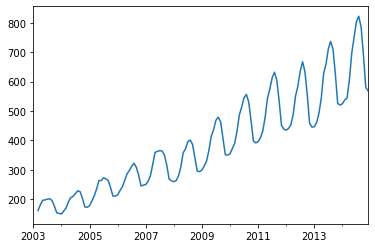

In [33]:
ts.rolling(window=3).mean().plot()

### ETS Models

In [34]:
train=ts[:'2014-06-01']   #For Training
test=ts['2014-07-01':]    #6 month data for testing

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [37]:
#our guessed parameters
alpha=0.4
beta=0.5
gama=0.01

# initialize model
ets_model=ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit=ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal= gama) #Model Training

<ipython-input-37-085e4caf7190>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit=ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal= gama) #Model Training
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [38]:
fcast=ets_fit.forecast(steps=6)

In [39]:
fcast

2014-07-01    841.182428
2014-08-01    850.825415
2014-09-01    657.294931
2014-10-01    580.087247
2014-11-01    540.942307
2014-12-01    643.126480
Freq: MS, dtype: float64

In [40]:
test

2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, dtype: int64

In [41]:
#MAPE
np.mean(abs(test-fcast)/test)

0.02857615609776389

In [42]:
#RMSE
np.sqrt(np.mean(test-fcast)**2)

8.24313468195148

In [43]:
##Learning Activity
#SARIMAX : SARIMA Model with X variables
#Prophet : It is package for time series forecasting, and it is developed by facebook

In [44]:
#MAE
np.mean(abs(test-fcast))

18.486576342222463

In [45]:
np.sqrt(np.mean((test-fcast)**2))

22.84772657499875

In [46]:
print('MAPE:', np.mean(abs(test-fcast)/test))

MAPE: 0.02857615609776389


In [47]:
import auto_holtwinters_UDF # Auto ETS model - It will try on all the combination of alpha , beta , gamma

In [48]:
?np.linspace

In [49]:
alpha=np.linspace(0,0.5,5)
beta=np.linspace(0,.5,5)
gamma=np.linspace(0,.5,5)

In [50]:
# 0, .125,.25, .375, .5

In [51]:
# our guessed parameters
alpha = 0.125
beta = 0.5
gamma = 0.25

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-51-6e104ce14500>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [52]:
fcast = ets_fit.forecast(steps=6)
print('MAPE', np.mean(np.abs(test - fcast)/test))

MAPE 0.014600376924178085


In [53]:
np.sqrt(np.mean((test-fcast)**2))

12.153814735694919

### To check stationarity

In [54]:
adfuller(ts)

(1.1088250591467357,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [55]:
adfuller(np.log(ts))

(-1.7324716814049652,
 0.4144644927491074,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -446.8186692532702)

In [56]:
adfuller(ts.diff(3).dropna())

(-2.936724468805417,
 0.04124108615679064,
 10,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 1066.9233840581205)

In [57]:
adfuller(np.log(ts).diff(2).dropna())

(-3.200721566232407,
 0.019942950105461075,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -434.9038941451596)

In [58]:
ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: int64

In [59]:
ts.diff(2)

2003-01-01      NaN
2003-02-01      NaN
2003-03-01     44.0
2003-04-01     42.0
2003-05-01     18.0
              ...  
2014-08-01     99.0
2014-09-01   -231.0
2014-10-01   -267.0
2014-11-01   -121.0
2014-12-01     24.0
Freq: MS, Name: Tractor_Sales, Length: 144, dtype: float64

In [60]:
adfuller(ts.diff(3).dropna())

(-2.936724468805417,
 0.04124108615679064,
 10,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 1066.9233840581205)

In [61]:
In_sales_ts=np.log(train)
adfuller(In_sales_ts.diff(2).dropna())

(-3.1701604353871904,
 0.021778195151746137,
 11,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 -414.6468825750811)

In [62]:
In_sales_ts_diff2=In_sales_ts.diff(2).dropna()

In [63]:
In_sales_ts_diff2

2003-03-01    0.271596
2003-04-01    0.237059
2003-05-01    0.092850
2003-06-01   -0.051558
2003-07-01    0.019513
                ...   
2014-02-01   -0.086530
2014-03-01    0.111627
2014-04-01    0.311436
2014-05-01    0.300798
2014-06-01    0.053474
Freq: MS, Name: Tractor_Sales, Length: 136, dtype: float64

In [64]:
# Ln_sales_ts_diff2 is stationary
# For ARIMA Model, your Yt = ln_sales_ts
# d = 2
# TO find the p,q values, you should create ACF & PACF of stationary series 

<AxesSubplot:>

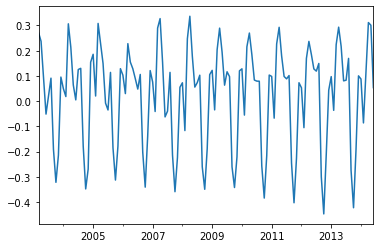

In [65]:
In_sales_ts_diff2.plot()

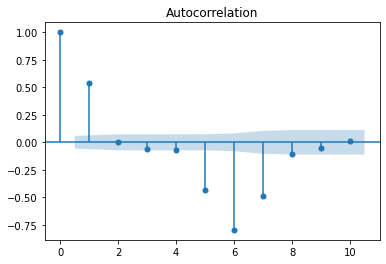

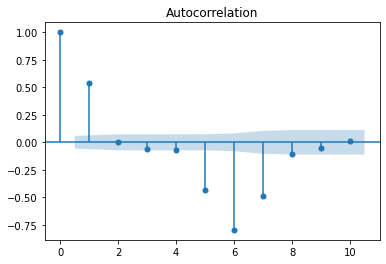

In [66]:
#To find the values of p, q, we need to ACF & PACF. The input time series for ACF & PACF is stationary series
smt.graphics.plot_acf(In_sales_ts_diff2.dropna(), lags=10, alpha=0.5)

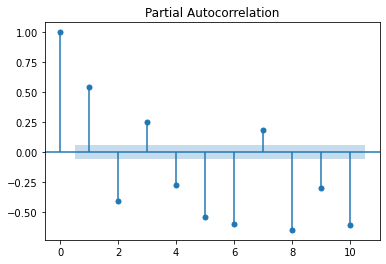

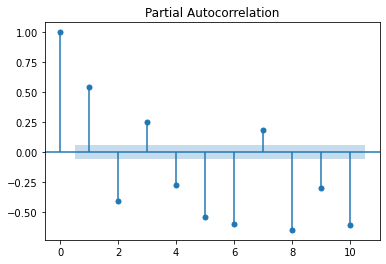

In [67]:
smt.graphics.plot_pacf(In_sales_ts_diff2.dropna(), lags=10, alpha=0.5, method='ols')

In [69]:
#(p,d,q)==(1,2,1)

In [74]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(In_sales_ts, order=(1,2,1),
                         seasonal_order=(1,0,1,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False).fit()
                         

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Tractor_Sales   No. Observations:                  138
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 222.077
Date:                            Mon, 08 Mar 2021   AIC                           -434.155
Time:                                    13:43:15   BIC                           -420.134
Sample:                                01-01-2003   HQIC                          -428.460
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3577      0.075     -4.763      0.000      -0.505      -0.211
ma.L1         -1.0000     59.971   

In [76]:
fact=np.exp(model.forecast(12))

In [81]:
np.sqrt(np.mean((test-fcast)**2))   #RMSE

12.153814735694919

In [82]:
test-fcast

2014-07-01    16.958158
2014-08-01    -3.283712
2014-09-01    -2.245068
2014-10-01    22.533314
2014-11-01     6.242167
2014-12-01     6.014496
Freq: MS, dtype: float64

In [ ]:
#Learning Activity
SARIMAX
Prophet:It is package for Time Series forecasting, and it is developed by facebook